In [1]:
%matplotlib inline
import sys, os
import numpy

In [2]:
os.environ['PYOPENGL_PLATFORM'] = 'egl'
import yt
import yt_idv
#import widgyts

In [3]:
rc = yt_idv.render_context(engine='egl', gui=True, width=1200, height=1200)

In [4]:
grid = numpy.zeros( (64,64,64))
grid[31:34, 31:34, 31:34] = 0.5
grid[60:64, 31:34, 28:35] = 1.0
grid[0:4, 0:4, 0:32] = 0.25
grid[0:4, 0:32, 0:4] = 0.45
grid[0:32, 0:4, 0:4] = 0.85
datad = dict(Density=grid)

In [5]:
bbox = numpy.array( [ [0,1], [0,1], [0,1] ])
ds = yt.load_uniform_grid( datad, grid.shape, 1.0, bbox=bbox )

yt : [INFO     ] 2022-03-25 14:01:13,735 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-03-25 14:01:13,737 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-03-25 14:01:13,738 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-25 14:01:13,739 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-25 14:01:13,740 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-03-25 14:01:14,094 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 14:01:14,094 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 14:01:14,096 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 14:01:14,096 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 14:01:14,100 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



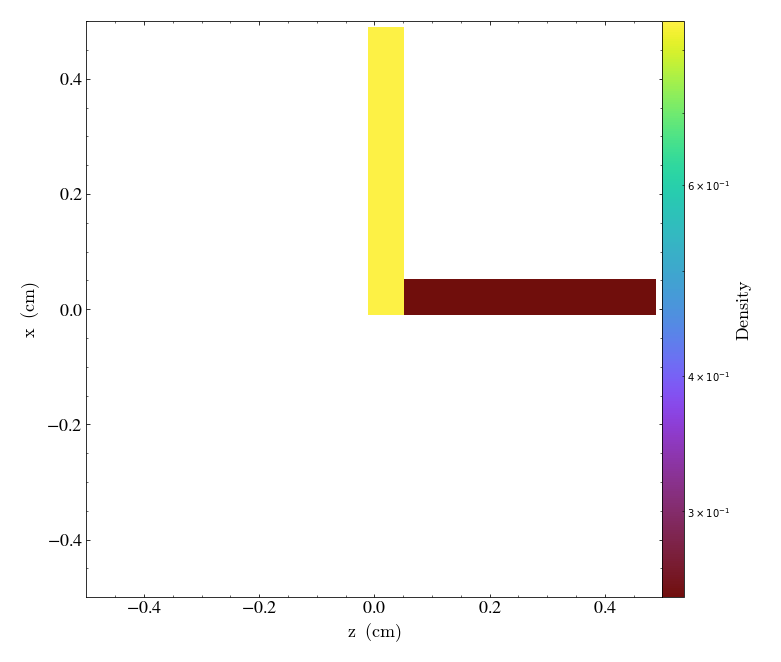

In [6]:
yt.SlicePlot(ds, 'y', 'Density', center=(.01,.01,.01))

yt : [INFO     ] 2022-03-25 14:01:15,141 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 14:01:15,142 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 14:01:15,143 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 14:01:15,143 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 14:01:15,145 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



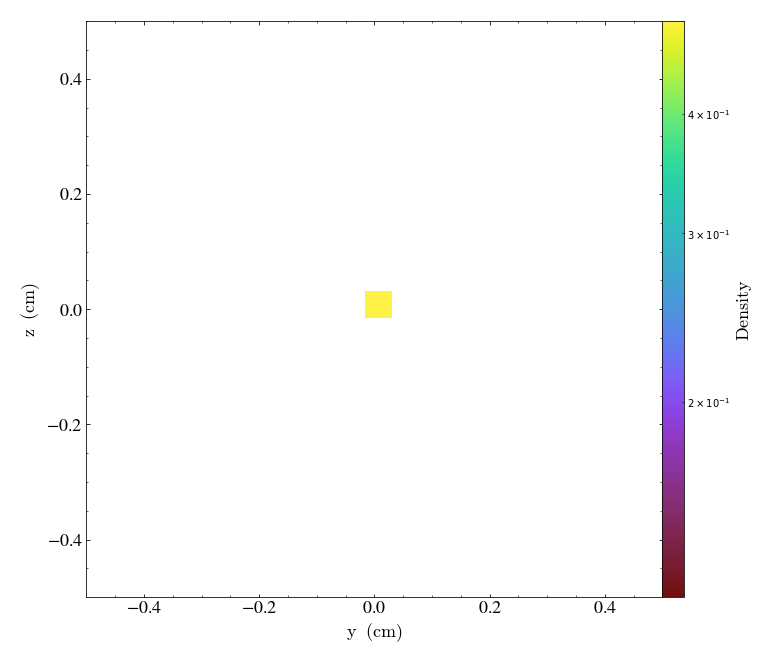

In [7]:
yt.SlicePlot(ds,'x','Density')

In [8]:
sg = rc.add_scene(ds, 'Density', no_ghost=True)

/fe0/gd/home/src/sci/yt_idv/yt_idv/scene_data/block_collection.py:56: RuntimeWarning: invalid value encountered in true_divide
  block.LeftEdge /= scale
/fe0/gd/home/src/sci/yt_idv/yt_idv/scene_data/block_collection.py:58: RuntimeWarning: divide by zero encountered in true_divide
  block.RightEdge /= scale


In [9]:
print("cmap_log = ", sg.components[0].cmap_log)
sg.components[0].cmap_log = False

cmap_log =  True


In [10]:
im = rc.run()

In [11]:
import matplotlib.pyplot as mp



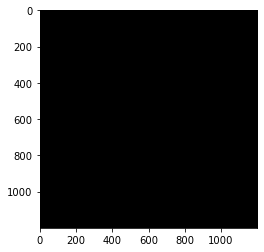

In [12]:
mp.imshow(im)

In [13]:
sg.components[0].cmap_log

False

In [14]:
rc.add_image()

/fe0/gd/home/src/sci/yt/yt/visualization/image_writer.py:152: RuntimeWarning: invalid value encountered in true_divide
  bitmap_array = np.clip(bitmap_array[:, :, :3] / max_val, 0.0, 1.0) * 255


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x04\xb0\x08\x06\x00\x00\x00\xeb!\xb3…

In [15]:
yt.__version__

'4.1.dev0'

In [16]:
sc = yt.create_scene(ds, lens_type='perspective', field='Density')
source = sc[0]
source.set_field('Density')
source.set_log(False)


<Volume Source>:YTRegion (UniformGridData): , center=[0.5 0.5 0.5] cm cm, left_edge=[0. 0. 0.] cm cm, right_edge=[1. 1. 1.] cm cm transfer_function:None

In [17]:
bounds = (0, 1)
tf = yt.ColorTransferFunction(bounds)
tf.add_gaussian( 0.25, width=.01, height=[1,0,0,1])
tf.add_gaussian( 0.45, width=.01, height=[0,1,0,1])
tf.add_gaussian( 0.85, width=.01, height=[0,0,1,1])
tf.add_gaussian( 0.5, width=.01, height=[.5,.5,.5,1])
tf.add_gaussian( 1.0, width=.01, height=[0,1,.6,.5])


In [18]:
import matplotlib.pyplot as mp

yt : [INFO     ] 2022-03-25 14:01:16,806 Rendering scene (Can take a while).
yt : [INFO     ] 2022-03-25 14:01:16,808 Creating volume
yt : [INFO     ] 2022-03-25 14:01:16,849 Creating transfer function
yt : [INFO     ] 2022-03-25 14:01:16,850 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


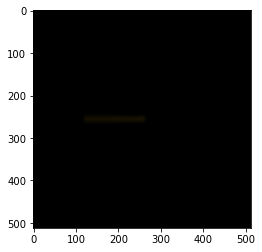

In [19]:
mp.imshow(sc.render())

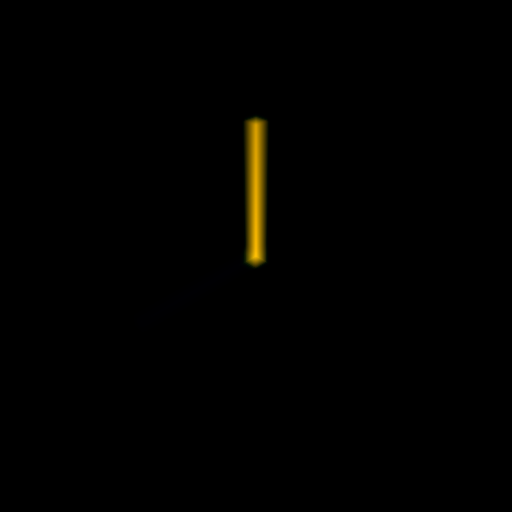

In [20]:
sc

In [21]:
sc.camera.lens

<Lens Object>:
	lens_type:perspective
	viewpoint:[0.0669873 0.0669873 0.0669873] code_length code_length

In [22]:
sc.camera.lens.viewpoint

unyt_array([0.0669873, 0.0669873, 0.0669873], 'code_length')

In [23]:
dir(sc.camera.lens)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_distributed',
 '_finalize_parallel',
 '_get_grid_objs',
 '_get_grids',
 '_get_objs',
 '_get_sampler_params',
 '_grids',
 '_initialize_parallel',
 'back_center',
 'box_vectors',
 'comm',
 'current_image',
 'front_center',
 'get_dependencies',
 'new_image',
 'num_threads',
 'origin',
 'partition_index_2d',
 'partition_index_3d',
 'partition_index_3d_bisection_list',
 'partition_region_3d',
 'project_to_plane',
 'sampler',
 'set_camera',
 'set_viewpoint',
 'setup_box_properties',
 'sub_samples',
 'viewpoint']

In [24]:
sc.camera.lens.set_viewpoint( [1,1,.5])

yt : [INFO     ] 2022-03-25 14:01:28,370 Rendering scene (Can take a while).


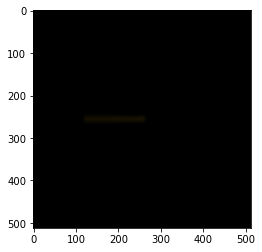

In [25]:
mp.imshow(sc.render())

In [26]:
sc.render()

ImageArray([[[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            ...,

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0.

In [27]:
import yt.visualization.volume_rendering as vr

In [28]:
vs = vr.render_source.VolumeSource( ds, field='Density')

TypeError: Can't instantiate abstract class VolumeSource with abstract methods _get_volume, render

In [ ]:
vs

In [ ]:
help(vs.tfh)